In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import yfinance as yf

In [ ]:
df = yf.download('BTC-USD','2015-1-1','2021-9-12')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488
2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013
2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597


In [ ]:
size = int(len(df)*0.9)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
df_test.shape

(245, 6)

In [ ]:
df_train = df_train.sort_index()
df_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [ ]:
df_train = df_train['Close']

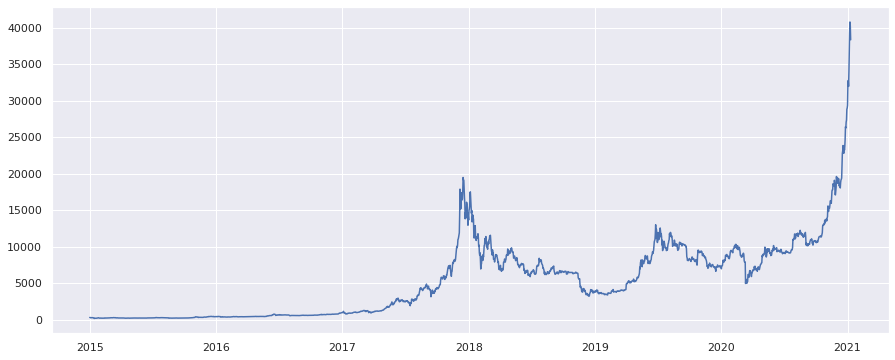

In [ ]:
plt.plot(df_train)

Text(0, 0.5, 'Weekly bitcoin price')

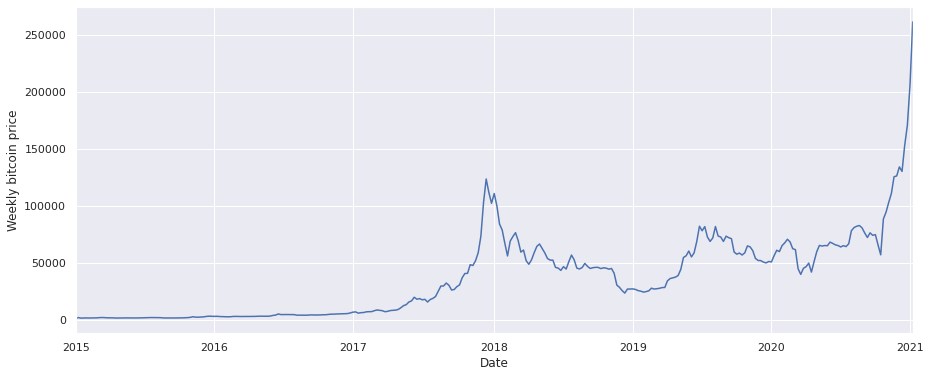

In [ ]:
weekly = df_train.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

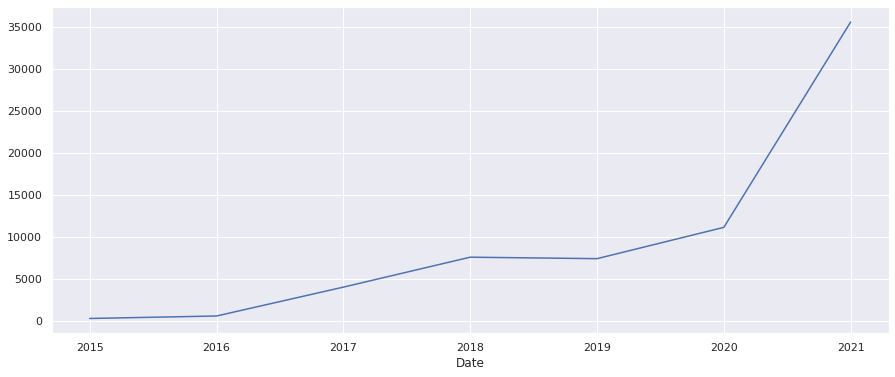

In [ ]:
by_year = df_train.groupby(df_train.index.year).mean()
by_year.plot()

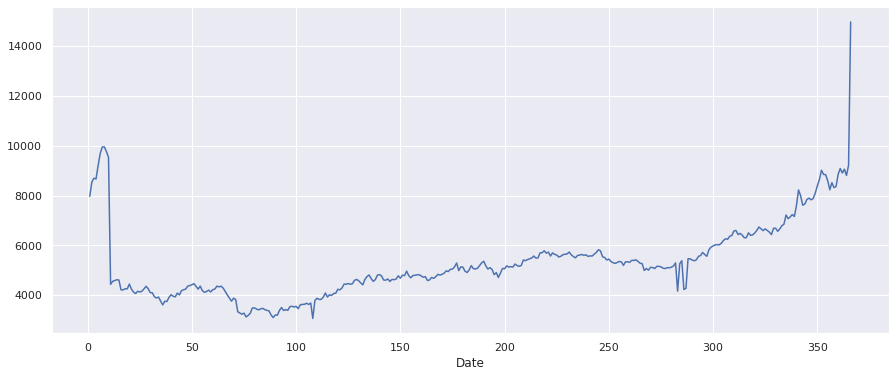

In [ ]:
by_day = df_train.groupby(df_train.index.dayofyear).mean()
by_day.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

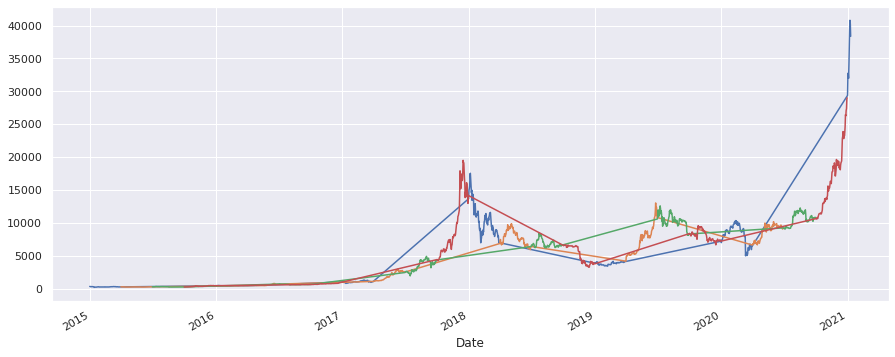

In [ ]:
by_quarter = df_train.groupby(df_train.index.quarter)
by_quarter.plot()

In [ ]:
ts = df_train

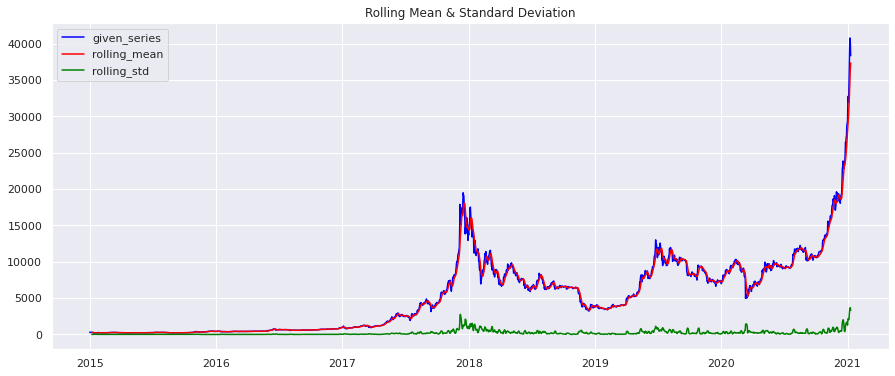

Results of Dickey-Fuller Test:
Test Statistic                    2.032651
p-value                           0.998714
#Lags Used                       20.000000
Number of Observations Used    2177.000000
Critical Value (1%)              -3.433357
Critical Value (5%)              -2.862869
Critical Value (10%)             -2.567477
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(ts)  

The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary

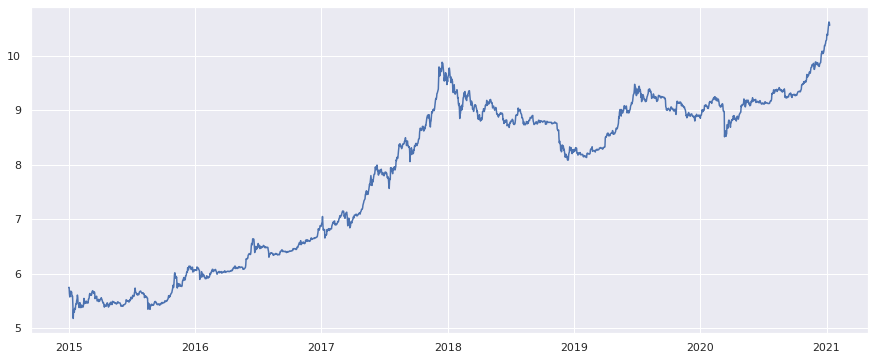

In [ ]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [ ]:
ts_logtransformed

Date
2015-01-01     5.750186
2015-01-02     5.752674
2015-01-03     5.638646
2015-01-04     5.576687
2015-01-05     5.614857
                ...    
2021-01-06    10.513915
2021-01-07    10.580786
2021-01-08    10.616379
2021-01-09    10.602978
2021-01-10    10.554678
Name: Close, Length: 2198, dtype: float64

In [ ]:
print(df_train.shape)
print(df_test.shape)

(2198,)
(245, 6)


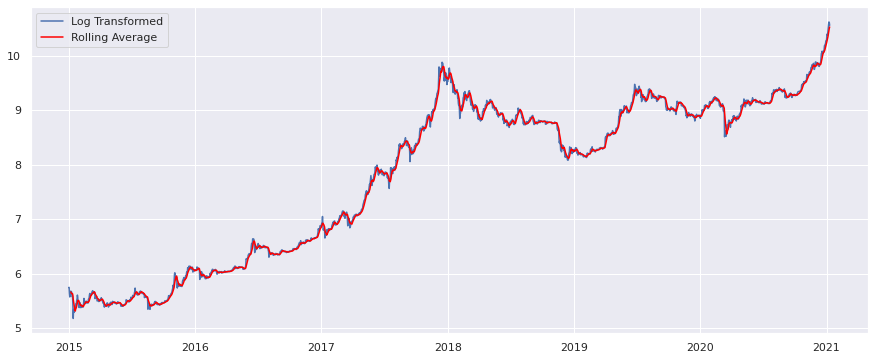

In [ ]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [ ]:
Rolling_average

Date
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2021-01-06    10.379785
2021-01-07    10.423453
2021-01-08    10.470383
2021-01-09    10.502600
2021-01-10    10.525035
Name: Close, Length: 2198, dtype: float64

In [ ]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2021-01-01    0.057159
2021-01-02    0.118901
2021-01-03    0.107452
2021-01-04    0.058732
2021-01-05    0.089017
2021-01-06    0.134130
2021-01-07    0.157333
2021-01-08    0.145996
2021-01-09    0.100378
2021-01-10    0.029643
Name: Close, dtype: float64

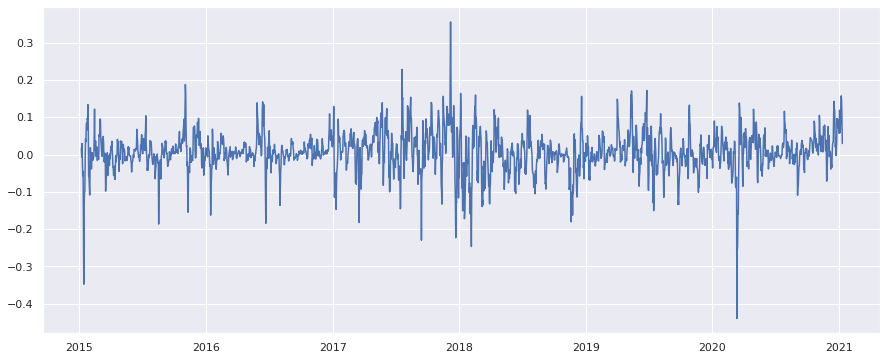

In [ ]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

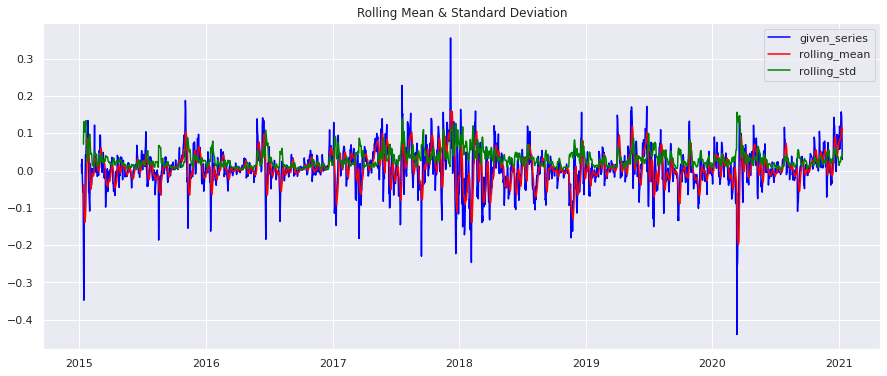

Results of Dickey-Fuller Test:
Test Statistic                -1.721088e+01
p-value                        6.370078e-30
#Lags Used                     3.000000e+00
Number of Observations Used    2.188000e+03
Critical Value (1%)           -3.433342e+00
Critical Value (5%)           -2.862862e+00
Critical Value (10%)          -2.567474e+00
dtype: float64


In [ ]:
test_for_stationary(log_Rolling_difference)

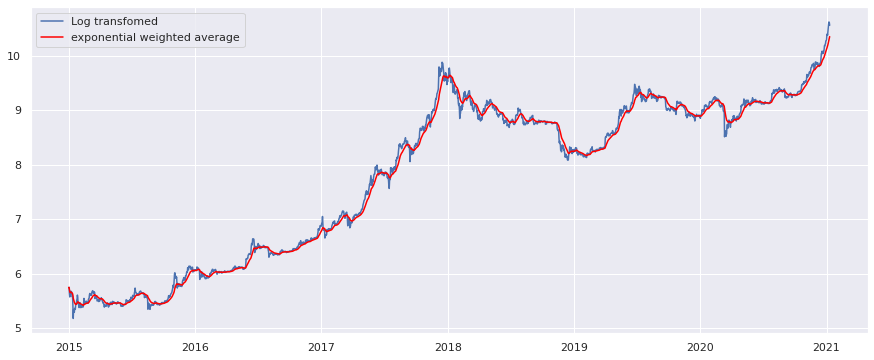

In [ ]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [ ]:
expwighted_avg

Date
2015-01-01     5.750186
2015-01-02     5.751492
2015-01-03     5.710097
2015-01-04     5.671640
2015-01-05     5.657931
                ...    
2021-01-06    10.231331
2021-01-07    10.264276
2021-01-08    10.297471
2021-01-09    10.326273
2021-01-10    10.347806
Name: Close, Length: 2198, dtype: float64

In [ ]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg
log_expmovwt_diff

Date
2015-01-01    0.000000
2015-01-02    0.001183
2015-01-03   -0.071450
2015-01-04   -0.094952
2015-01-05   -0.043074
                ...   
2021-01-06    0.282584
2021-01-07    0.316510
2021-01-08    0.318908
2021-01-09    0.276705
2021-01-10    0.206871
Name: Close, Length: 2198, dtype: float64

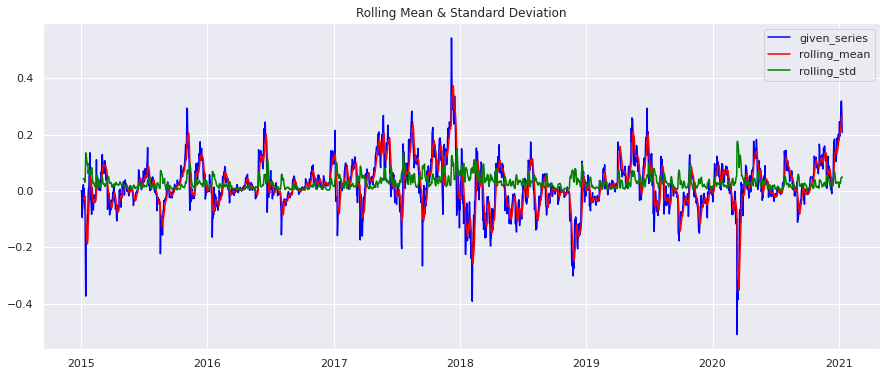

Results of Dickey-Fuller Test:
Test Statistic                -9.284230e+00
p-value                        1.227732e-15
#Lags Used                     1.000000e+00
Number of Observations Used    2.196000e+03
Critical Value (1%)           -3.433331e+00
Critical Value (5%)           -2.862857e+00
Critical Value (10%)          -2.567471e+00
dtype: float64


In [ ]:
test_for_stationary(log_expmovwt_diff)

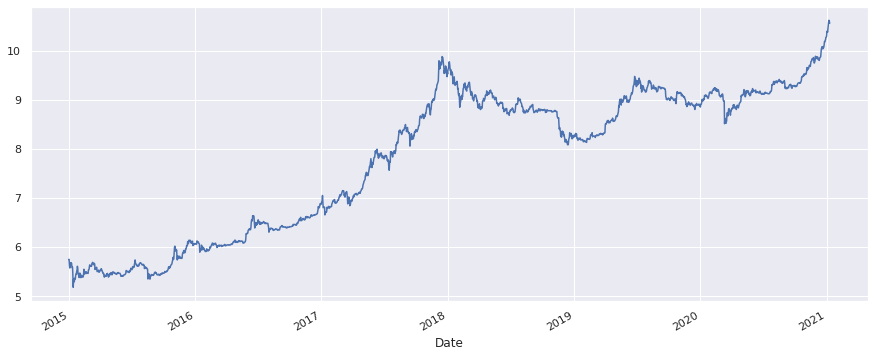

In [ ]:
ts_logtransformed.plot()

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08   -0.103506
2015-01-09   -0.081387
2015-01-10   -0.022617
Name: Close, dtype: float64

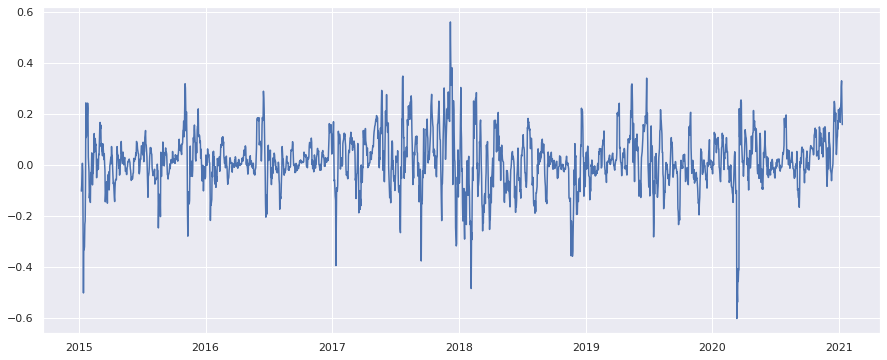

In [ ]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

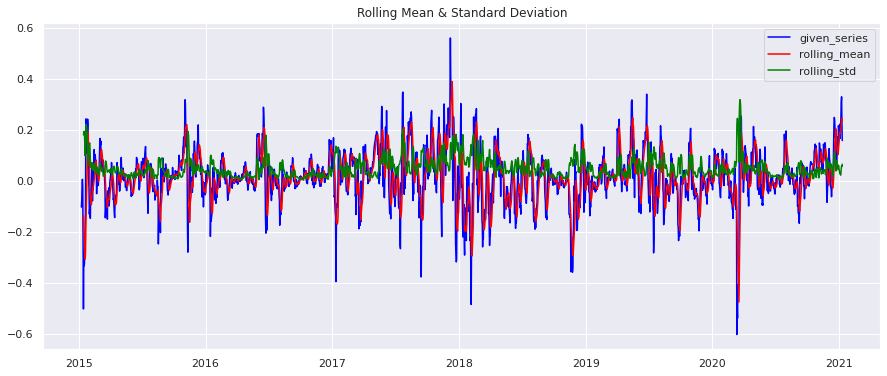

Results of Dickey-Fuller Test:
Test Statistic                -8.272524e+00
p-value                        4.750954e-13
#Lags Used                     2.600000e+01
Number of Observations Used    2.164000e+03
Critical Value (1%)           -3.433375e+00
Critical Value (5%)           -2.862877e+00
Critical Value (10%)          -2.567482e+00
dtype: float64


In [ ]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts_logtransformed = pd.DataFrame(ts_logtransformed, columns = ['Close'])

In [ ]:
decompose = seasonal_decompose(ts_logtransformed.Close.values, freq=30)

In [ ]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

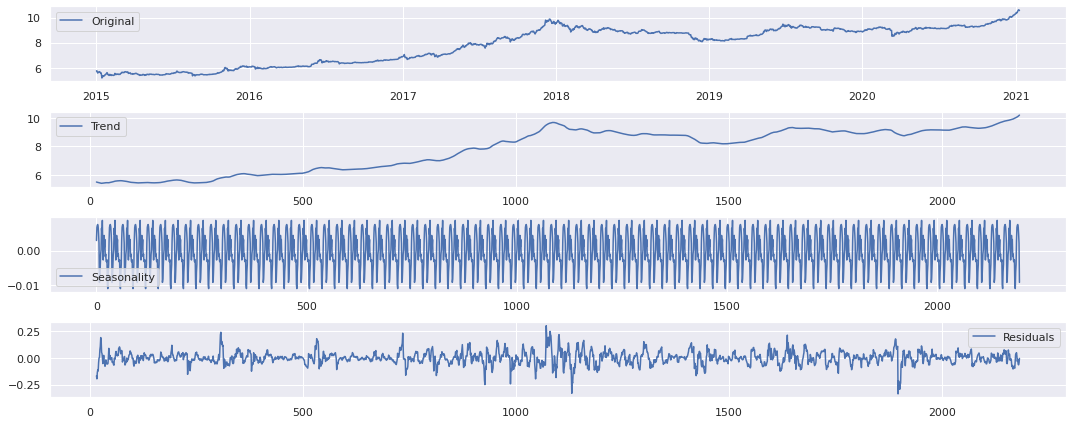

In [ ]:
plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomposed_TS = residual
#decomposed_TS.dropna(inplace=True)
#test_for_stationary(decomposed_TS)

In [ ]:
#Plot ACF: 
#plt.subplot(121) 
#plt.plot(lag_acf)
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
#plt.title('Autocorrelation Function')

In [ ]:
#Plot PACF:
#plt.subplot(122)
#plt.plot(lag_pacf)
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
#plt.title('Partial Autocorrelation Function')
#plt.tight_layout()

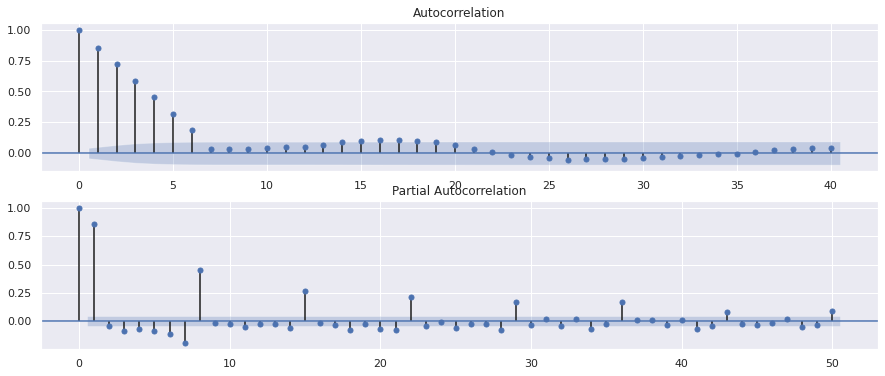

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

## MA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 24.2648')

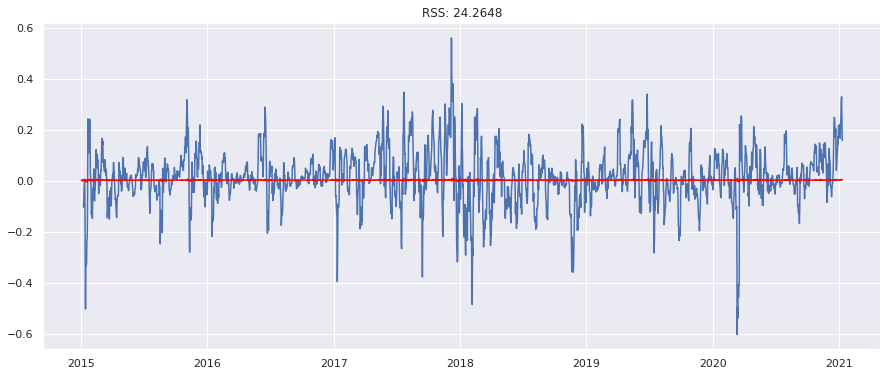

In [ ]:
model = ARIMA(ts_logtransformed, order=(0, 1, 5)) 
results_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [ ]:
#model summary
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2197
Model:                 ARIMA(0, 1, 5)   Log Likelihood                4002.010
Method:                       css-mle   S.D. of innovations              0.039
Date:                Fri, 17 Sep 2021   AIC                          -7990.021
Time:                        21:05:44   BIC                          -7950.157
Sample:                             1   HQIC                         -7975.453
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0022      0.001      2.548      0.011       0.001       0.004
ma.L1.D.Close    -0.0186      0.021     -0.868      0.385      -0.061       0.023
ma.L2.D.Close     0.0064      0.022     

count    2197.000000
mean        0.000003
std         0.039153
min        -0.465347
25%        -0.013200
50%         0.000014
75%         0.015131
max         0.225480
dtype: float64


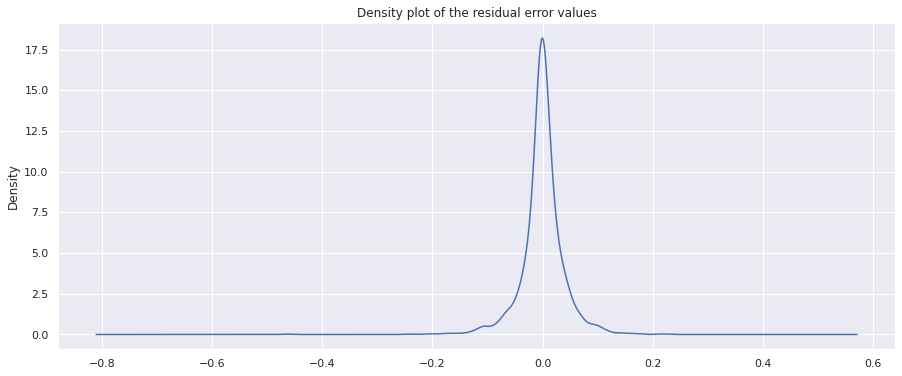

In [ ]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

In [ ]:
df_test = df_test['Close']
df_test = df_test.sort_index()
df_test

KeyError: ignored

In [ ]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2015-01-02    0.002185
2015-01-03    0.002179
2015-01-04    0.004309
2015-01-05    0.002626
2015-01-06   -0.000620
dtype: float64


In [ ]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2015-01-02    0.002185
2015-01-03    0.004364
2015-01-04    0.008673
2015-01-05    0.011300
2015-01-06    0.010680
dtype: float64


In [ ]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log

Date
2015-01-01         NaN
2015-01-02    0.002185
2015-01-03    0.004364
2015-01-04    0.008673
2015-01-05    0.011300
                ...   
2021-01-06    4.785206
2021-01-07    4.787538
2021-01-08    4.789988
2021-01-09    4.793017
2021-01-10    4.798218
Length: 2198, dtype: float64

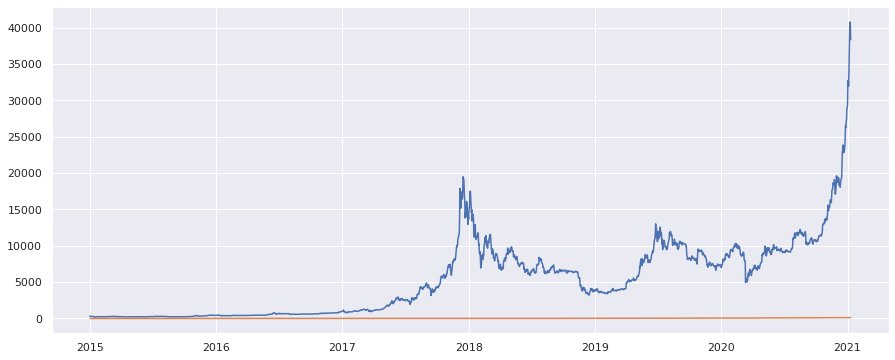

In [ ]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(df_train)
plt.plot(predictions_MA)

In [ ]:
#dates = df_test['2021-06-13':'2021-07-30']
forecast = pd.Series(results_MA.forecast(steps=245)[0])
forecast = np.exp(forecast)
forecast


0      38563.537385
1      38678.187974
2      38750.485320
3      38809.303078
4      38857.732888
           ...     
240    65075.145821
241    65217.483724
242    65360.132960
243    65503.094211
244    65646.368159
Length: 245, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r_squre = r2_score(df_test, forecast)
print("r2_score:", r_squre)

r2_score: -1.4327013283503156


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_test, forecast)
print('MAE: %f' % mae)

MAE: 12996.576124


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df_test, forecast)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 14684.820543


In [ ]:
test = df_test.to_numpy()
pred = forecast.to_numpy()
errors = abs(test - pred)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 68.29 %.


#ARMA model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


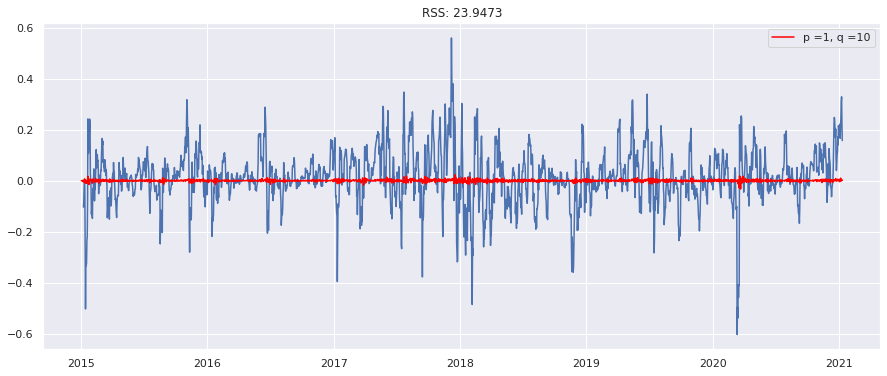

In [ ]:
model = ARIMA(ts_logtransformed, order=(1, 1, 10))  
results_ARMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARMA.fittedvalues, color='red', label = 'p =1, q =10')
RSS =results_ARMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [ ]:
print(results_ARMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2197
Model:                ARIMA(1, 1, 10)   Log Likelihood                4008.292
Method:                       css-mle   S.D. of innovations              0.039
Date:                Fri, 17 Sep 2021   AIC                          -7992.584
Time:                        21:05:03   BIC                          -7924.246
Sample:                             1   HQIC                         -7967.611
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close      0.2171      0.362      0.600      0.549      -0.492       0.927
ma.L1.D.Close     -0.2299      0.361     -0.636      0.525      -0.938       0.478
ma.L2.D.Close      0.0115      0.022

count    2197.000000
mean        0.001999
std         0.038990
min        -0.464860
25%        -0.011665
50%         0.001727
75%         0.017591
max         0.220012
dtype: float64


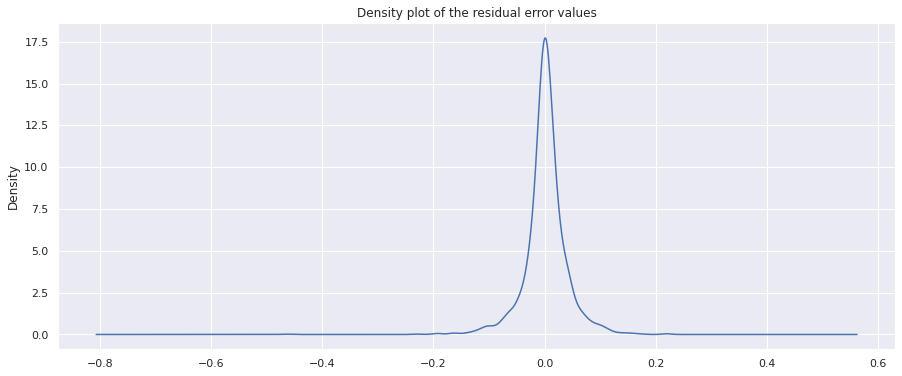

In [ ]:
results_ARMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARMA.resid.describe())

In [ ]:
predictions_ARMA_diff = pd.Series(results_ARMA.fittedvalues, copy=True)
print(predictions_ARMA_diff.head())

Date
2015-01-02    0.000000
2015-01-03   -0.000034
2015-01-04    0.001548
2015-01-05   -0.000036
2015-01-06   -0.003157
dtype: float64


In [ ]:
predictions_ARMA_diff_cumsum = predictions_ARMA_diff.cumsum()
print(predictions_ARMA_diff_cumsum.head())

Date
2015-01-02    0.000000
2015-01-03   -0.000034
2015-01-04    0.001514
2015-01-05    0.001478
2015-01-06   -0.001679
dtype: float64


In [ ]:
predictions_ARMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARMA_log = predictions_ARMA_log.add(predictions_ARMA_diff_cumsum,fill_value=0)
predictions_ARMA_log.head()

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-03   -0.000034
2015-01-04    0.001514
2015-01-05    0.001478
dtype: float64

In [ ]:
#dates = df_test['2021-06-13':'2021-07-30']
forecast = pd.Series(results_ARMA.forecast(steps=245)[0])
forecast = np.exp(forecast)
print(forecast)

0      38536.928396
1      38872.407671
2      38969.032149
3      38782.739772
4      38673.548524
           ...     
240    39035.591273
241    39035.591273
242    39035.591273
243    39035.591273
244    39035.591273
Length: 245, dtype: float64


In [ ]:
from sklearn.metrics import r2_score
r_squre = r2_score(df_test, forecast)
print("r2_score:", r_squre)

r2_score: -0.400178855969344


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_test, forecast)
print('MAE: %f' % mae)

MAE: 9084.470496


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df_test, forecast)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 11080.150232


In [ ]:
test = df_test.to_numpy()
pred = forecast.to_numpy()

In [ ]:
errors = abs(test - pred)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.32 %.
